# **Finlatics Data Analysis Project**

- done on Global Youtube Statistics dataset
- Answering 20 real-world questions with visuals, stats, and correlations.

Importing essential libraries for data manipulation and visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the YouTube dataset from a CSV file

In [ ]:
file_path = "Global YouTube Statistics.csv"
data = pd.read_csv(file_path)

data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
print("columns : " , data.columns)
print("shape : " , data.shape)


columns :  Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')
shape :  (995, 29)


## Dropping Duplicates
Removing duplicate entries based on the 'rank' column

In [ ]:
df = data.drop_duplicates(subset='rank')

# file_path2 = "/content/drive/MyDrive/Datasets/Cleaned Global YouTube Statistics.csv"
# df.to_csv(file_path2)


## Data Handling
- Checking for null values and handling them appropriately using drop or fill methods

In [ ]:
print(df.isnull().sum())
print(df.shape)

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    53
Title                                        0
uploads                                      0
Country of origin                          122
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month

In [ ]:
# Dropping missing values because more values are missing
df.dropna(subset= ['Country','Gross tertiary education enrollment (%)','channel_type','subscribers_for_last_30_days'], inplace=True)

# As some Channels are missing category, we can use mode to fill remaining data
df['category'] = df['category'].fillna(df['category'].mode()[0])

# Filling missing values bcz only some values are missing
df['subscribers'] = df['subscribers'].fillna(df['subscribers'].mean())
df['video_views_for_the_last_30_days'] = df['video_views_for_the_last_30_days'].fillna(df['video_views_for_the_last_30_days'].mean())
df['created_month'] = df['created_month'].fillna(1)
df['created_year'] = df['created_year'].fillna(2000).astype(int)

## Data Standardization
- Converting month names to numerical format and standardizing country names

In [ ]:
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['created_month'] = df['created_month'].map(month_mapping)

# Standardizing country names by converting to lowercase and then capitalizing
df['Country'] = df['Country'].str.lower().str.capitalize()

# Questions

### 1. What are the top 10 YouTube channels based on the number of subscribers?

1) Top 10 YouTube channels based on subscribers:
                      Youtuber  subscribers
0                     T-Series  245000000.0
2                      MrBeast  166000000.0
3   Cocomelon - Nursery Rhymes  162000000.0
4                    SET India  159000000.0
8                  Like Nastya  106000000.0
9                Vlad and Niki   98900000.0
10           Zee Music Company   96700000.0
11                         WWE   96000000.0
13                   BLACKPINK   89800000.0
15                    Sony SAB   83000000.0


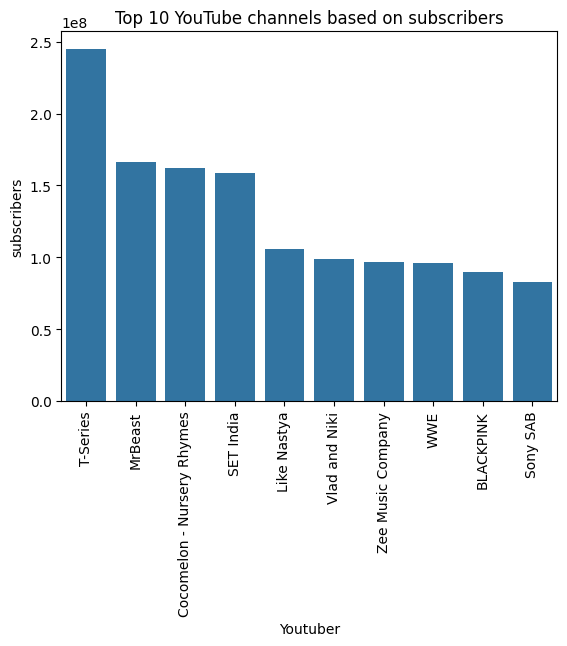

In [134]:
top_10_channels = df.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']]
print("1) Top 10 YouTube channels based on subscribers:")
print(top_10_channels)
sns.barplot(x= top_10_channels['Youtuber'],y= top_10_channels['subscribers'])
plt.title('Top 10 YouTube channels based on subscribers')
plt.xlabel('Youtuber')
plt.ylabel('subscribers')
plt.xticks(rotation=90)
plt.show()

### 2. Which category has the highest average number of subscribers?

In [135]:
avg_subscribers_by_category = df.groupby('category')['subscribers'].mean().idxmax() # returns the indax of max
print(f"2) Category with the highest average number of subscribers: {avg_subscribers_by_category}")


2) Category with the highest average number of subscribers: Shows


### 3. How many videos, on average, are uploaded by YouTube channels in each category?

In [136]:
avg_uploads_by_category = df.groupby('category')['uploads'].mean()
print("3) Average number of uploads by category:")
print(avg_uploads_by_category)


3) Average number of uploads by category:
category
Autos & Vehicles           1898.500000
Comedy                     1340.024390
Education                  2451.454545
Entertainment             14871.469613
Film & Animation           3264.689655
Gaming                     2787.960000
Howto & Style              1838.000000
Movies                     3553.000000
Music                      2914.144144
News & Politics          138764.619048
Nonprofits & Activism    102912.000000
People & Blogs            15972.652778
Pets & Animals             5932.666667
Science & Technology       2218.916667
Shows                     29730.666667
Sports                    12303.111111
Trailers                   6839.000000
Name: uploads, dtype: float64


### 4. What are the top 5 countries with the highest number of YouTube channels?

In [137]:
top_5_countries = df['Country'].value_counts().nlargest(5)
print("4) Top 5 countries with the highest number of YouTube channels:")
print(top_5_countries)


4) Top 5 countries with the highest number of YouTube channels:
Country
United states     200
India             144
Brazil             33
United kingdom     27
Indonesia          20
Name: count, dtype: int64


### 5. What is the distribution of channel types across different categories?

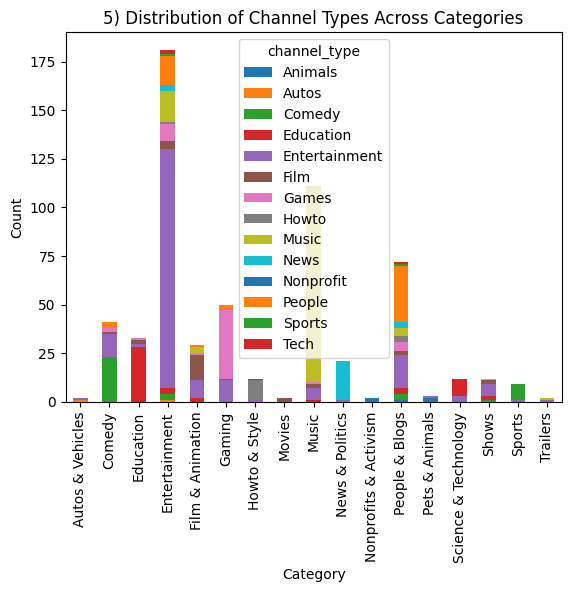

In [138]:
channel_type_distribution = df.groupby('category')['channel_type'].value_counts().unstack()
channel_type_distribution.plot(kind='bar', stacked=True)
plt.title('5) Distribution of Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


### 6. Is there a correlation between the number of subscribers and total video views for YouTube channels?


In [139]:
correlation = df['subscribers'].corr(df['video views'])
print(f"Correlation between subscribers and video views: {correlation}")


Correlation between subscribers and video views: 0.8490718417991214


### 7. How do the monthly earnings vary throughout different categories?

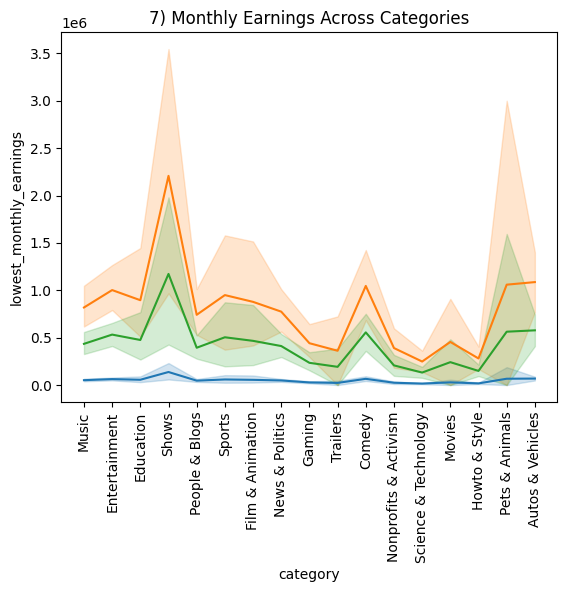

In [140]:
df['avg_monthly_earnings'] = (df['highest_monthly_earnings']+df['lowest_monthly_earnings'])/2
sns.lineplot(x='category', y='lowest_monthly_earnings', data=df)
sns.lineplot(x='category', y='highest_monthly_earnings', data=df)
sns.lineplot(x='category', y='avg_monthly_earnings', data=df)
plt.title('7) Monthly Earnings Across Categories')
plt.xticks(rotation=90)
plt.show()


### 8. What is the overall trend in subscribers gained in the last 30 days across all channels?


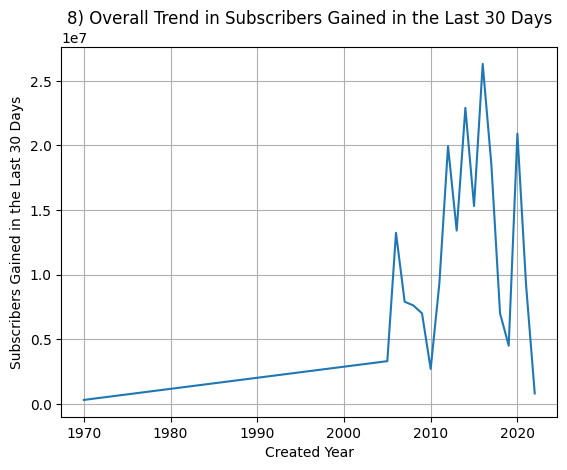

In [141]:
subscribers_trend = df.groupby('created_year')['subscribers_for_last_30_days'].sum()
subscribers_trend.plot(kind='line')
plt.title('8) Overall Trend in Subscribers Gained in the Last 30 Days')
plt.xlabel('Created Year')
plt.ylabel('Subscribers Gained in the Last 30 Days')
plt.grid(True)
plt.show()


### 9. Are there any outliers in terms of yearly earnings from YouTube channels?


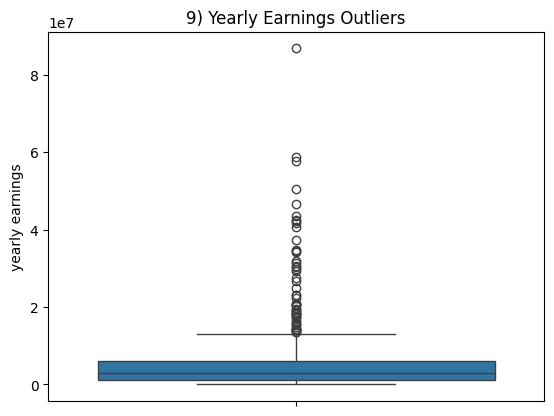

In [142]:
df['avg_yearly_earnings'] = (df['highest_yearly_earnings']+df['lowest_yearly_earnings'])/2
# sns.boxplot(y='highest_yearly_earnings', data=df)
# sns.boxplot(y='lowest_yearly_earnings', data=df)
sns.boxplot(y='avg_yearly_earnings', data=df)
plt.title('9) Yearly Earnings Outliers')
plt.ylabel('yearly earnings')
plt.show()


### 10. What is the distribution of channel creation dates? Is there any trend over time?


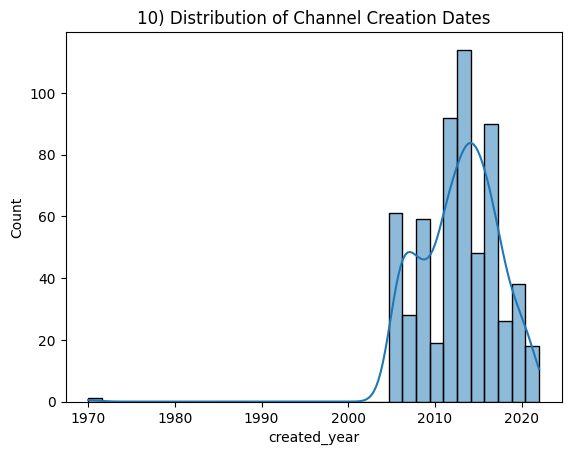

In [143]:
sns.histplot(df['created_year'], kde=True)
plt.title('10) Distribution of Channel Creation Dates')
plt.show()


### 11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?


In [144]:
gtee = df.groupby('Country')['Gross tertiary education enrollment (%)'].mean()
channels_per_country = df['Country'].value_counts()
education_vs_channels = pd.concat([gtee, channels_per_country], axis=1).dropna()
correlation_education_channels = channels_per_country.corr(gtee)
print(f"11) Correlation between education enrollment and number of YouTube channels: {correlation_education_channels}")


11) Correlation between education enrollment and number of YouTube channels: 0.056224350215756336


### 12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?


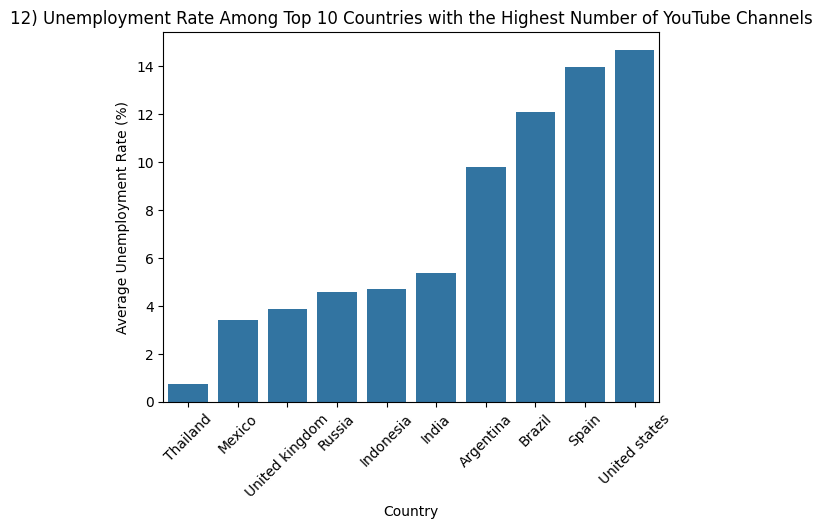

In [145]:
top_10_countries = df['Country'].value_counts().nlargest(10).index
top_10_unemployment_rates = df[df['Country'].isin(top_10_countries)][['Country', 'Unemployment rate']]
# Calculate the average unemployment rate for each of the top 10 countries
average_unemployment_rates = top_10_unemployment_rates.groupby('Country')['Unemployment rate'].mean().sort_values()
sns.barplot(x=average_unemployment_rates.index, y=average_unemployment_rates.values)
plt.title('12) Unemployment Rate Among Top 10 Countries with the Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


### 13. What is the average urban population percentage in countries with YouTube channels?

13) The overall average urban population percentage in countries with YouTube channels is: 74540259.74%


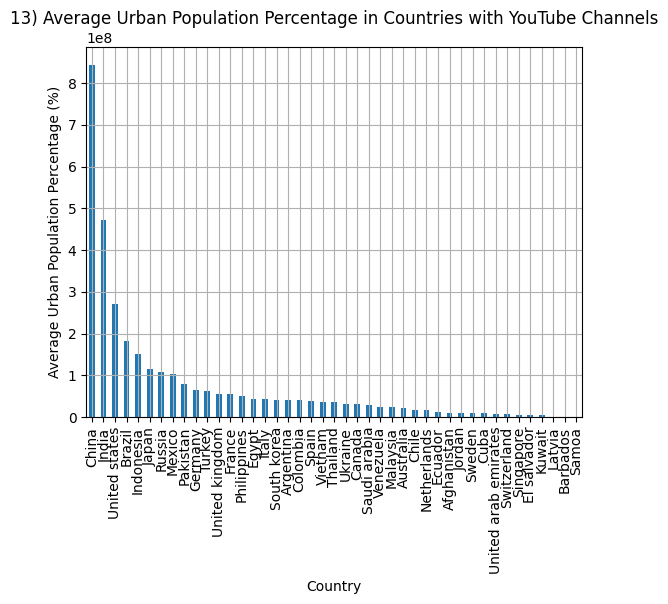

In [146]:
average_urban_population = df.groupby('Country')['Urban_population'].mean()
overall_average_urban_population = average_urban_population.mean()
print(f"13) The overall average urban population percentage in countries with YouTube channels is: {overall_average_urban_population:.2f}%")
average_urban_population.sort_values(ascending=False).plot(kind='bar')
plt.title('13) Average Urban Population Percentage in Countries with YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Average Urban Population Percentage (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?


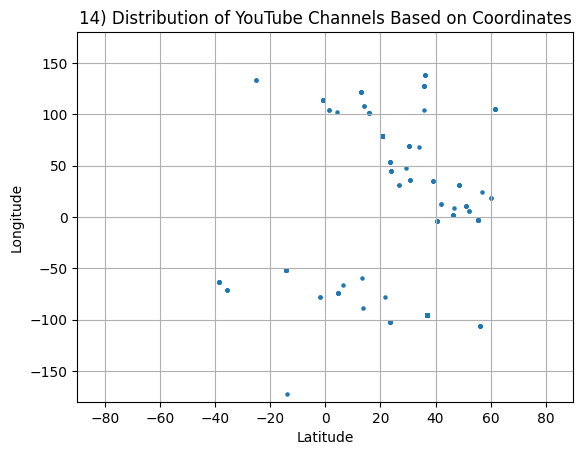

In [147]:
# To find the paterns in latitude and longitude
plt.scatter(df['Latitude'], df['Longitude'], s= 5)
plt.title('14) Distribution of YouTube Channels Based on Coordinates')
plt.grid(True)
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.ylabel('Longitude')
plt.ylim(-180,180)
plt.show()


### 15. What is the correlation between the number of subscribers and the population of a country?


In [148]:
correlation_subscribers_population = df['subscribers'].corr(df['Population'])
print(f"15) Correlation between number of subscribers and population: {correlation_subscribers_population}")


15) Correlation between number of subscribers and population: 0.09169695313457635


### 16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?


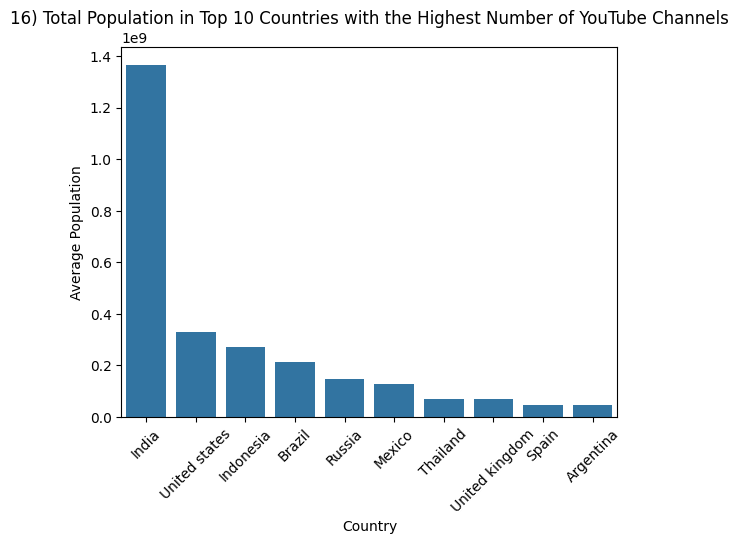

In [149]:
country_channel_count = df['Country'].value_counts().head(10)
top_10_countries_data = df[df['Country'].isin(top_10_countries)]
average_population = top_10_countries_data.groupby('Country')['Population'].mean().sort_values(ascending=False)
# Plot the total population for the top 10 countries
sns.barplot(x=average_population.index, y=average_population.values)
plt.title('16) Total Population in Top 10 Countries with the Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Average Population')
plt.xticks(rotation=45)
plt.show()


### 17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?


In [150]:
correlation_subscribers_unemployment = df['subscribers_for_last_30_days'].corr(df['Unemployment rate'])
print(f"17) Correlation between subscribers gained in last 30 days and unemployment rate: {correlation_subscribers_unemployment}")


17) Correlation between subscribers gained in last 30 days and unemployment rate: -0.024256156268496944


### 18. How does the distribution of video views for the last 30 days vary across different channel types?


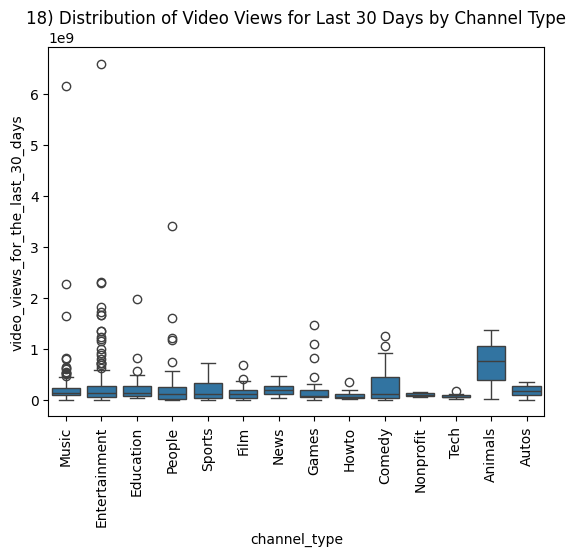

In [151]:
sns.boxplot(x='channel_type', y='video_views_for_the_last_30_days', data=df)
plt.title('18) Distribution of Video Views for Last 30 Days by Channel Type')
plt.xticks(rotation=90)
plt.show()


### 19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?


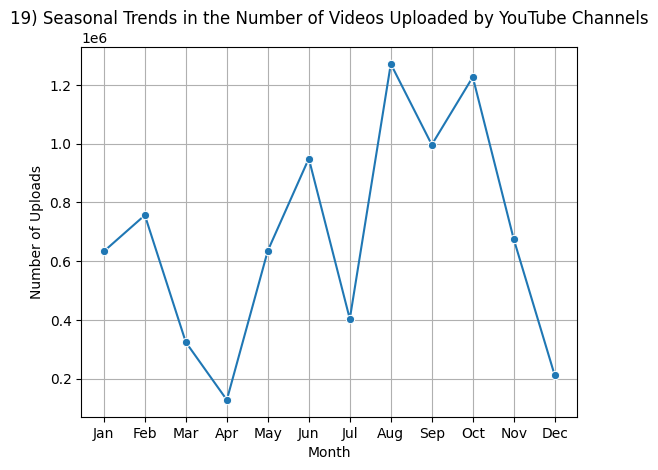

In [152]:
monthly_uploads = df.groupby('created_month')['uploads'].sum().reset_index()
# Plot the seasonal trend
sns.lineplot(x='created_month', y='uploads', data=monthly_uploads, marker='o')
plt.title('19) Seasonal Trends in the Number of Videos Uploaded by YouTube Channels')
plt.xlabel('Month')
plt.ylabel('Number of Uploads')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


### 20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?


20) The overall average number of subscribers gained per month since the creation of YouTube channels is: 182192.64


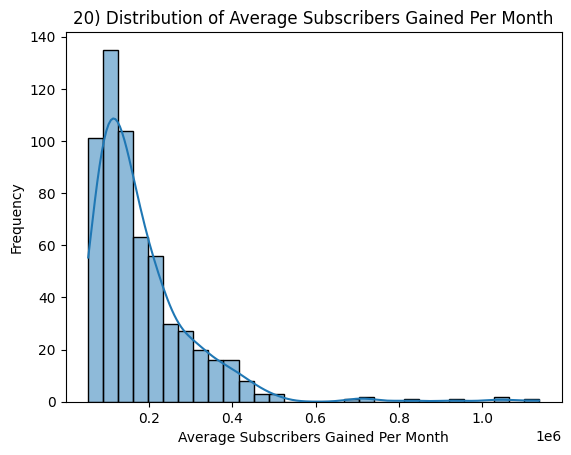

In [153]:
from datetime import date

current_date = date.today()
current_year = current_date.year
current_month = current_date.month

df['months_active'] = (current_year - df['created_year']) * 12 + (current_month - df['created_month'])
df['avg_subscribers_per_month'] = df['subscribers'] / df['months_active']
overall_avg_subscribers_per_month = df['avg_subscribers_per_month'].mean()

print(f"20) The overall average number of subscribers gained per month since the creation of YouTube channels is: {overall_avg_subscribers_per_month:.2f}")
# Plot the distribution of average subscribers gained per month
sns.histplot(df['avg_subscribers_per_month'], bins=30, kde=True)
plt.title('20) Distribution of Average Subscribers Gained Per Month')
plt.xlabel('Average Subscribers Gained Per Month')
plt.ylabel('Frequency')
plt.show()
